___
# Ciência dos Dados - PROJETO 1

GABRIEL MOURA ALMEIDA

Análise do uso de aparelhos eletrônicos em domicílios de acordo com as faixas de renda mensais, no estado de São Paulo.

___
## Introdução

Acesso à internet e TV

Principal pergunta: •	Qual dos 3 aparelhos eletrônicos: televisão, microcomputadores e celulares aparecem mais nos domicílios do estado de São Paulo de acordo com a respectiva faixa de renda mensal (separados por número de salários mínimos)?

Pretendo analisar e comparar o uso de aparelhos eletrônicos como: computadores, celulares e televisão em diferentes faixas de renda mensal nos domicílios no estado de São Paulo.

Variáveis de Interesse:
- Rendimento mensal domiciliar per capita
- Tem telefone móvel celular
- Tem televisão em cores
- Microcomputador é utilizado para acessar a Internet
- Existência de morador de 0 a 17 anos de idade


Filtro de Tipos de Domicílios
- Unidade da Federação
- Total de moradores
- Condição de ocupação do domicílio
- Código de situação censitária


___
## Análise e Resultados

In [188]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.style.use('ggplot')

In [189]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())


Esperamos trabalhar no diretório
C:\Users\Gabriel Moura\Documents\Insper\2 Semestre\Ciência dos Dados\Projeto 1\Ciencia-dos-Dados


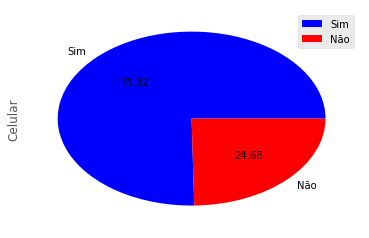

In [190]:
# Projeto1CD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados = pd.read_csv('PNAD/PNAD DOM2009/DOM2009csv/DOM2009.csv',sep=',') #abrindo a PNAD 2009
# Definindo varíaveis das colunas
dados = dados.rename(columns={"UF":"Estados","V4622":"Salario","V2020":"Celular","V4621":"Renda","V0226":"Televisão","V0232":"Microcomputador","V2123":"Menor"})
dados_resumidos = dados[dados.Estados == 35] #filtragem para São Paulo 
# Selecionando colunas
dados_resumidos = dados_resumidos.ix[:, ["Celular","Salario","Televisão","Microcomputador","Renda","Total de moradores","CódigoCensitário","Menor"]]
# Trasnformando varíaveis em qualitativas
dados_resumidos.Celular = dados_resumidos.Celular.astype('category')
dados_resumidos.Televisão = dados_resumidos.Televisão.astype('category')
dados_resumidos.Microcomputador = dados_resumidos.Microcomputador.astype('category')
dados_resumidos.CódigoCensitário= dados_resumidos.CódigoCensitário.astype('category')
dados_resumidos.Menor = dados_resumidos.Menor.astype('category')
dados_resumidos.Salario = dados_resumidos.Salario.astype('category')
# Definindo categorias das variáveis qualitativas
dados_resumidos.Celular.cat.categories = ('Sim', 'Não')
dados_resumidos.Televisão.cat.categories = ('Sim', 'Não')
dados_resumidos.Microcomputador.cat.categories = ('Sim', 'Não')
dados_resumidos.Menor.cat.categories = ('Sim','Não')
dados_resumidos.Salario.cat.categories = ("0","Até 1/4 de salário mínimo","Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos","N")
# Tirando NAN e null
dados_resumidos= dados_resumidos[dados_resumidos.Microcomputador.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Celular.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Televisão.notnull()]
dados_resumidos= dados_resumidos[dados_resumidos.Menor.notnull()]

# Gráficos de Pizzas
dfc = dados_resumidos.Celular.value_counts(True)
dfc.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

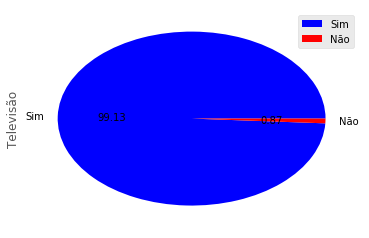

In [191]:
dfc1 = dados_resumidos.Televisão.value_counts(True)
dfc1.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

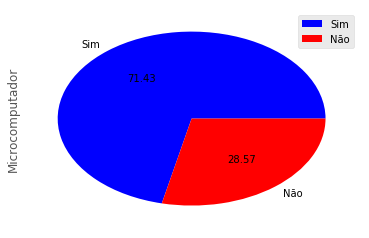

In [192]:
dfc2 = dados_resumidos.Microcomputador.value_counts()
dfc2.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=True)

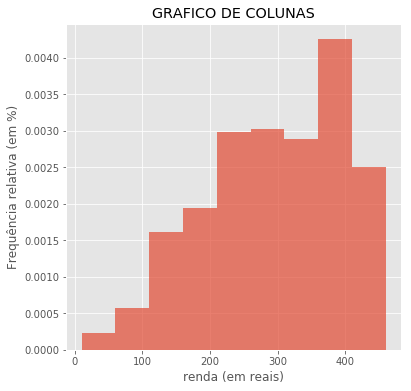

In [193]:
# Gráfico de Colunas para Renda
from numpy import zeros_like
dados_resumidos.Renda.describe()
faixa = range(10,500,50)
Renda_cat = pd.cut(dados_resumidos.Renda, bins=faixa)
Renda_cat.value_counts(sort=False, normalize=True)*100
plot = dados_resumidos.Renda.plot.hist(bins=faixa,title='GRAFICO DE COLUNAS', weights=zeros_like(dados_resumidos.Renda)+1./dados_resumidos.Renda.size*100, figsize=(6, 6), alpha=0.7, normed=1)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda (em reais)')


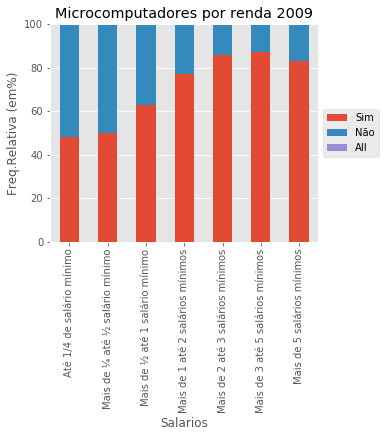

In [194]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

ct3 = pd.crosstab(dados_resumidos.Microcomputador,dados_resumidos.Salario,margins=True,rownames=['Computador'],colnames=['Salarios']).apply(percConvert, axis=0)
ct3 = ct3.iloc[:,1:8]
plot = ct3.T.plot(kind='bar', stacked=True,title='Microcomputadores por renda 2009')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

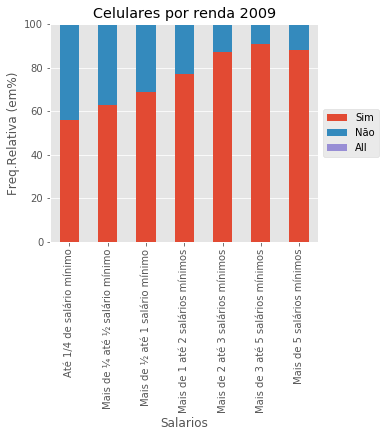

In [195]:
ct1 = pd.crosstab(dados_resumidos.Celular,dados_resumidos.Salario,margins=True,rownames=['Celular'],colnames=['Salarios']).apply(percConvert, axis=0)
ct1 = ct1.iloc[:,1:8]
plot = ct1.T.plot(kind='bar', stacked=True,title='Celulares por renda 2009')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

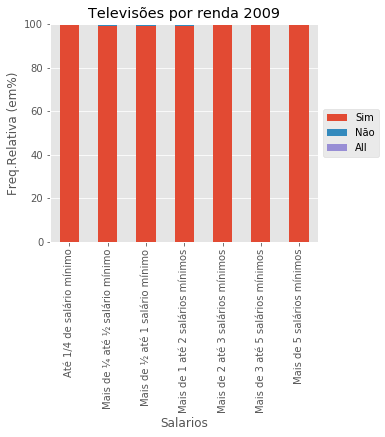

In [196]:
ct2 = pd.crosstab(dados_resumidos.Televisão,dados_resumidos.Salario,margins=True,rownames=['Telvisão'],colnames=['Salarios']).apply(percConvert, axis=0)
ct2 = ct2.iloc[:,1:8]
plot = ct2.T.plot(kind='bar', stacked=True,title='Televisões por renda 2009')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [197]:
#GRÁFICOMatador2009

In [198]:
#2015
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados2 = pd.read_csv('PNAD/PNAD DOM2015/DOM2015csv/DOM2015.csv',sep=',')
dados2 = dados2.rename(columns={"UF":"Estados","V4622":"Salario","V0220":"Celular","V4621":"Renda","V0226":"Televisão","V0231":"Microcomputador"})
dados_resumidos2 = dados2[dados2.Estados == 35] #filtragem para São Paulo 

dados_resumidos2 = dados_resumidos2.ix[:, ["Celular","Salario","Televisão","Microcomputador","Renda"]]
dados_resumidos2.Celular = dados_resumidos2.Celular.astype('category')
dados_resumidos2.Televisão = dados_resumidos2.Televisão.astype('category')
dados_resumidos2.Microcomputador = dados_resumidos2.Microcomputador.astype('category')
dados_resumidos2.Salario = dados_resumidos2.Salario.astype('category')
dados_resumidos2.Celular.cat.categories = ('Sim', 'Não')
dados_resumidos2.Televisão.cat.categories = ('Sim', 'Não')
dados_resumidos2.Microcomputador.cat.categories = ('Sim', 'Não')
dados_resumidos2.Salario.cat.categories = ("0","Até 1/4 de salário mínimo","Mais de ¼ até ½ salário mínimo","Mais de ½ até 1 salário mínimo","Mais de 1 até 2 salários mínimos","Mais de 2 até 3 salários mínimos","Mais de 3 até 5 salários mínimos","Mais de 5 salários mínimos","N")
dados_resumidos2= dados_resumidos2[dados_resumidos2.Microcomputador.notnull()]
dados_resumidos2= dados_resumidos2[dados_resumidos2.Celular.notnull()]
dados_resumidos2= dados_resumidos2[dados_resumidos2.Televisão.notnull()]








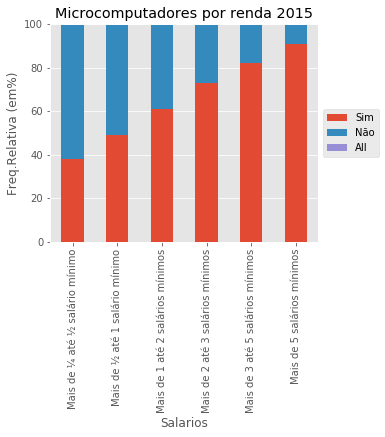

In [199]:
ctt1 = pd.crosstab(dados_resumidos2.Microcomputador,dados_resumidos2.Salario,margins=True,rownames=['Computador'],colnames=['Salarios']).apply(percConvert, axis=0)
ctt1 = ctt.iloc[:,1:8]
plot = ctt1.T.plot(kind='bar', stacked=True,title='Microcomputadores por renda 2015')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

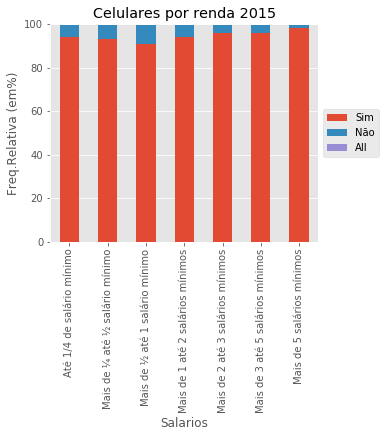

In [200]:
ctt2 = pd.crosstab(dados_resumidos2.Celular,dados_resumidos2.Salario,margins=True,rownames=['Celular'],colnames=['Salarios']).apply(percConvert, axis=0)
ctt2= ctt2.iloc[:,1:8]
plot = ctt2.T.plot(kind='bar', stacked=True,title='Celulares por renda 2015')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

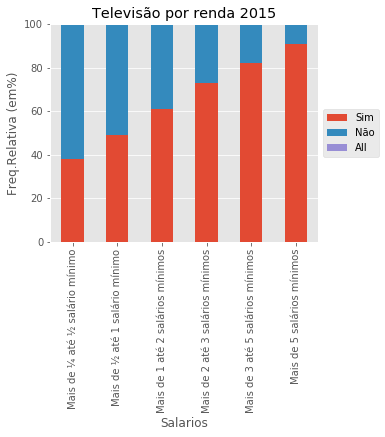

In [201]:
ctt3 = pd.crosstab(dados_resumidos2.Televisão,dados_resumidos2.Salario,margins=True,rownames=['Televisão'],colnames=['Salarios']).apply(percConvert, axis=0)
ctt3 = ctt.iloc[:,1:8]
plot = ctt3.T.plot(kind='bar', stacked=True,title='Televisão por renda 2015')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [202]:
#GráficoMatador2015

___
## Conclusão 

Descreva aqui suas conclusões!